1) IMPORTING LIBRARIES

In [1]:

import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import spacy

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from wordcloud import WordCloud
import contractions
from textblob import Word
from nltk.corpus import stopwords

2) DATA EXTRACTION

In [4]:
data = pd.read_csv('data/IMDB Dataset.csv')

In [5]:
#display first 5 rows from the dataset
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
'''shape attribute returns a tuple representing the dimensions of the
array or dataframe, where the first element is the number of rows and
the second element is the number of columns'''
data.shape

(50000, 2)

In [7]:
#column names
data.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
#identifying missing values
null_values = data.isnull().sum()
print(null_values[0], null_values[1])

0 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_20872\2644299835.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(null_values[0], null_values[1])


In [9]:
#converting target variable to numeric labels
data.sentiment = [ 1 if each == "positive" else 0 for each in data.sentiment]

In [10]:
#after converting labels
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


sentiment
1    25000
0    25000
Name: count, dtype: int64

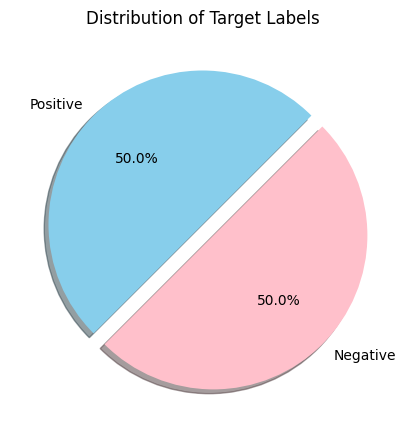

In [11]:
#Plotting the Pie chart
fig = plt.figure(figsize=(5,5))
colors = ["skyblue",'pink']
pos = data[data['sentiment']==1]
neg = data[data['sentiment']==0]
ck = [pos['sentiment'].count(),neg['sentiment'].count()]
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))
plt.title("Distribution of Target Labels")
data.sentiment.value_counts()

3) DATA PREPROCESSING

In [12]:
#HTML tags removal
data['review'] = data['review'].apply(lambda words: re.sub('<.*?>','',words))
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
#Contractions Expansion
contractions_dict = contractions.contractions_dict
contractions_dict

{"I'm": 'I am',
 "I'm'a": 'I am about to',
 "I'm'o": 'I am going to',
 "I've": 'I have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'd": 'I would',
 "I'd've": 'I would have',
 'Whatcha': 'What are you',
 "amn't": 'am not',
 "ain't": 'are not',
 "aren't": 'are not',
 "'cause": 'because',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "daren't": 'dare not',
 "daresn't": 'dare not',
 "dasn't": 'dare not',
 "didn't": 'did not',
 'didn’t': 'did not',
 "don't": 'do not',
 'don’t': 'do not',
 "doesn't": 'does not',
 "e'er": 'ever',
 "everyone's": 'everyone is',
 'finna': 'fixing to',
 'gimme': 'give me',
 "gon't": 'go not',
 'gonna': 'going to',
 'gotta': 'got to',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he've": 'he have',
 "he's": 'he is',
 "he'll": 'he will',
 "he'll've": 'he will have',
 "he'd": 'he would',
 "he'd've": 'he would have',
 

In [14]:
def contraction_expansion(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [15]:
data['review'] = data['review'].apply(lambda x: contraction_expansion(x))

In [16]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there is a family where a little boy...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
#Converting the text to lowercase
data['review'] = data['review'].apply(lambda x: str(x).lower())
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [18]:
#Removing Special Characters
def RemoveSpecialChars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

In [19]:
data['review'] = data['review'].apply(lambda x: RemoveSpecialChars(str(x)))
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there is a family where a little boy...,0
4,petter matteis love in the time of money is a ...,1


In [20]:
#Removing Stop Words
stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies

In [21]:
def RemoveStopWords(x):
    
    return ' '.join([word for word in x.split() if word not in stop_words])

data['review']=data['review'].apply(lambda x: RemoveStopWords(x))

data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1


In [22]:
#Lemmatization
nlp = spacy.load('en_core_web_lg')


def lemme(x):
       
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
            
        x_list.append(lemma)
        
    return ' '.join(x_list)

In [23]:
data['review'] = data['review'].apply(lambda x: lemme(x))
data.head()

,review,sentiment
0,one reviewer mention watch 1 oz episode hook r...,1
1,wonderful little production filming technique ...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter matteis love time money visually stunni...,1


4) FEATURE EXTRACTION

In [24]:
#convert the textual data into feature vectors
tfidf=TfidfVectorizer(max_features = 1000)
X_train_tfidf=tfidf.fit_transform(data['review'])

5) SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [ ]:
#iloc is a method used in pandas  to select rows by index
#it is used for integer-location based indexing
#train = data.iloc[:25000]
#test = data.iloc[25000:]

In [ ]:
#train.shape, test.shape

In [ ]:
#train.head()

In [ ]:
#X=data['review']

#y=data['sentiment']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.3, random_state=4, stratify = y)

In [ ]:
#print("Train data:",  X_train.shape, y_train.shape)
#print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 1000) (35000,)
Test data: (15000, 1000) (15000,)


In [ ]:
#clf_lr = LogisticRegression()

In [ ]:
#clf_lr.fit(X_train_tfidf, y)

#y_pred = clf_lr.predict(X_test)
#print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8731333333333333


In [25]:
#X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'],
                                                    #test_size=0.2,
                                                    #random_state=0,
                                                    #stratify=data['sentiment']
                                                    #)

In [145]:
# Splitting dataset in 80-20 fashion .i.e.  
# Training set is 80% of total data 
# Combined set of testing & validation is  
# 20% of total data 
X_train_lr, X_Combine_lr, y_train_lr, y_Combine_lr = train_test_split(data['review'], data['sentiment'], 
                                              train_size=0.8, 
                                              random_state=42) 
  

In [146]:
# Splitting combined dataset in 50-50 fashion .i.e.  
# Testing set is 50% of combined dataset 
# Validation set is 50% of combined dataset 
X_val_lr, X_test_lr, y_val_lr, y_test_lr = train_test_split(X_Combine_lr, 
                                                y_Combine_lr, 
                                                test_size=0.5, 
                                                random_state=42) 


In [147]:
X_train_lr.shape, X_test_lr.shape, X_val_lr.shape 

((40000,), (5000,), (5000,))

In [148]:
clf_lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf_lr', LogisticRegression())])

In [150]:
clf_lr.fit(X_train_lr, y_train_lr)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf_lr', LogisticRegression())])

In [151]:
y_pred_lr = clf_lr.predict(X_test_lr)

In [152]:
clf_report_lr=classification_report(y_test_lr, y_pred_lr)
print(clf_report_lr)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2462
           1       0.89      0.90      0.89      2538

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [153]:
acc_lr=accuracy_score(y_test_lr, y_pred_lr)
print(acc_lr)

0.8922


In [133]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

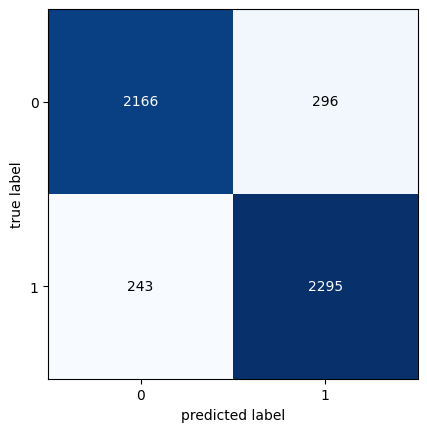

In [134]:
cm_lr = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_lr)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'],
                                                    #test_size=0.2,
                                                    #random_state=0,
                                                    #stratify=data['sentiment']
                                                    #)

In [36]:
from sklearn.svm import LinearSVC

In [157]:
X_train_svm, X_Combine_svm, y_train_svm, y_Combine_svm = train_test_split(data['review'], data['sentiment'], 
                                              train_size=0.8, 
                                              random_state=42) 

In [158]:
X_val_svm, X_test_svm, y_val_svm, y_test_svm = train_test_split(X_Combine_svm, 
                                                y_Combine_svm, 
                                                test_size=0.5, 
                                                random_state=42) 

In [159]:
clf_svm = Pipeline([('tfidf', TfidfVectorizer()), ('clf_svm', LinearSVC())])

In [160]:
clf_svm.fit(X_train_svm, y_train_svm)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf_svm', LinearSVC())])

In [161]:
y_pred_svm = clf_svm.predict(X_test_svm)

In [162]:
clf_report_svm=classification_report(y_test_svm, y_pred_svm)
print(clf_report_svm)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2462
           1       0.89      0.91      0.90      2538

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



In [163]:
print(accuracy_score(y_test_svm, y_pred_svm))

0.8964


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

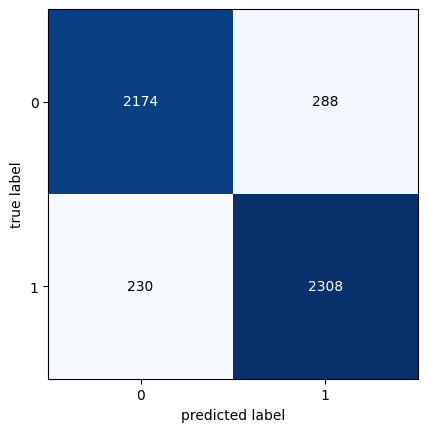

In [77]:
cm_svm = confusion_matrix(y_test_svm, y_pred_svm)
plot_confusion_matrix(cm_svm)

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [164]:
X_train_nb, X_Combine_nb, y_train_nb, y_Combine_nb = train_test_split(data['review'], data['sentiment'], 
                                              train_size=0.8, 
                                              random_state=42) 

In [165]:
X_val_nb, X_test_nb, y_val_nb, y_test_nb = train_test_split(X_Combine_nb, 
                                                y_Combine_nb, 
                                                test_size=0.5, 
                                                random_state=42)

In [166]:
clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf_nb', MultinomialNB())])

In [198]:
clf_nb.fit(X_train_nb, y_train_nb)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf_nb', MultinomialNB())])

In [168]:
y_pred_nb = clf_nb.predict(X_test_nb)

In [169]:
print(classification_report(y_test_nb, y_pred_nb))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2462
           1       0.87      0.86      0.87      2538

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



In [170]:
print(accuracy_score(y_test_nb, y_pred_nb))

0.8654


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

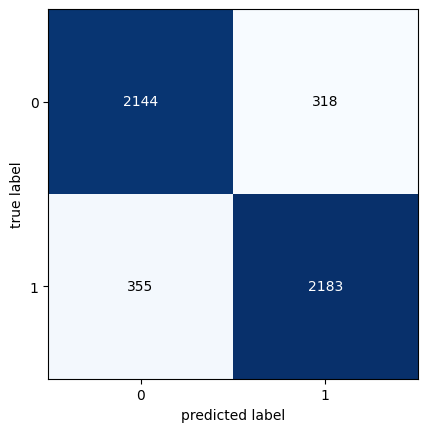

In [171]:
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)
plot_confusion_matrix(cm_nb)

In [172]:
#ensemble model
from sklearn.ensemble import VotingClassifier

In [204]:
#X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)
X_train, X_Combine, y_train, y_Combine = train_test_split(data['review'], data['sentiment'], 
                                              train_size=0.8, 
                                              random_state=42) 

X_val, X_test, y_val, y_test = train_test_split(X_Combine, 
                                                y_Combine, 
                                                test_size=0.5, 
                                                random_state=42)

In [205]:
clf_ensemble = VotingClassifier(estimators=[('lr', clf_lr), ('svm', clf_svm), ('nb', clf_nb)], voting='hard')

In [206]:
clf_ensemble.fit(X_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf_lr',
                                               LogisticRegression())])),
                             ('svm',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf_svm', LinearSVC())])),
                             ('nb',
                              Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                              ('clf_nb', MultinomialNB())]))])

In [207]:
y_pred = clf_ensemble.predict(X_test)

In [208]:
print(accuracy_score(y_test, y_pred))

0.8994


In [209]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2462
           1       0.89      0.91      0.90      2538

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

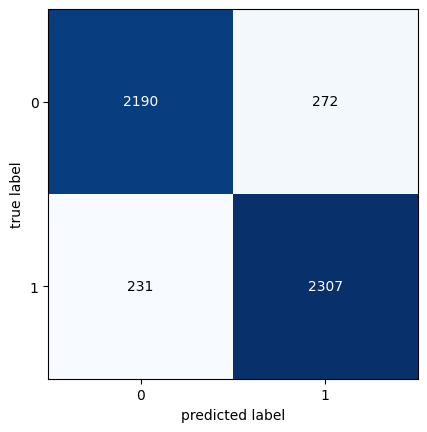

In [210]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
X_train_rfc, X_Combine_rfc, y_train_rfc, y_Combine_rfc = train_test_split(data['review'], data['sentiment'], 
                                              train_size=0.8, 
                                              random_state=42) 

In [196]:
X_val_rfc, X_test_rfc, y_val_rfc, y_test_rfc = train_test_split(X_Combine_rfc, 
                                                y_Combine_rfc, 
                                                test_size=0.5, 
                                                random_state=42)

In [197]:
clf_rfc = Pipeline([('tfidf', TfidfVectorizer()), ('clf_rfc', RandomForestClassifier())])

In [199]:
clf_rfc.fit(X_train_rfc, y_train_rfc)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf_rfc', RandomForestClassifier())])

In [200]:
y_pred_rfc = clf_rfc.predict(X_test_rfc)

In [211]:
print(accuracy_score(y_test_rfc, y_pred_rfc))

0.8486


In [212]:
print(classification_report(y_test_rfc, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2462
           1       0.86      0.84      0.85      2538

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

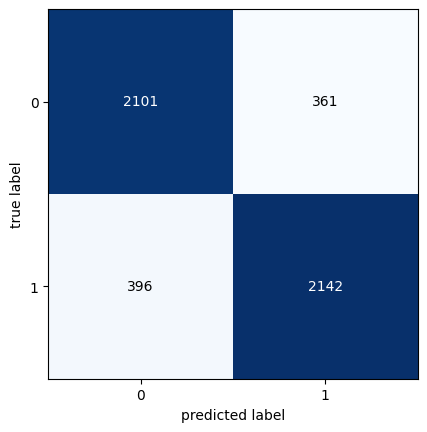

In [213]:
cm_rfc = confusion_matrix(y_test_rfc, y_pred_rfc)
plot_confusion_matrix(cm_rfc)